# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('data/nndb_flat.csv')
df.set_index('ID', inplace=True)

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [8]:
df_num_pre = df.select_dtypes(include='number')

<AxesSubplot: >

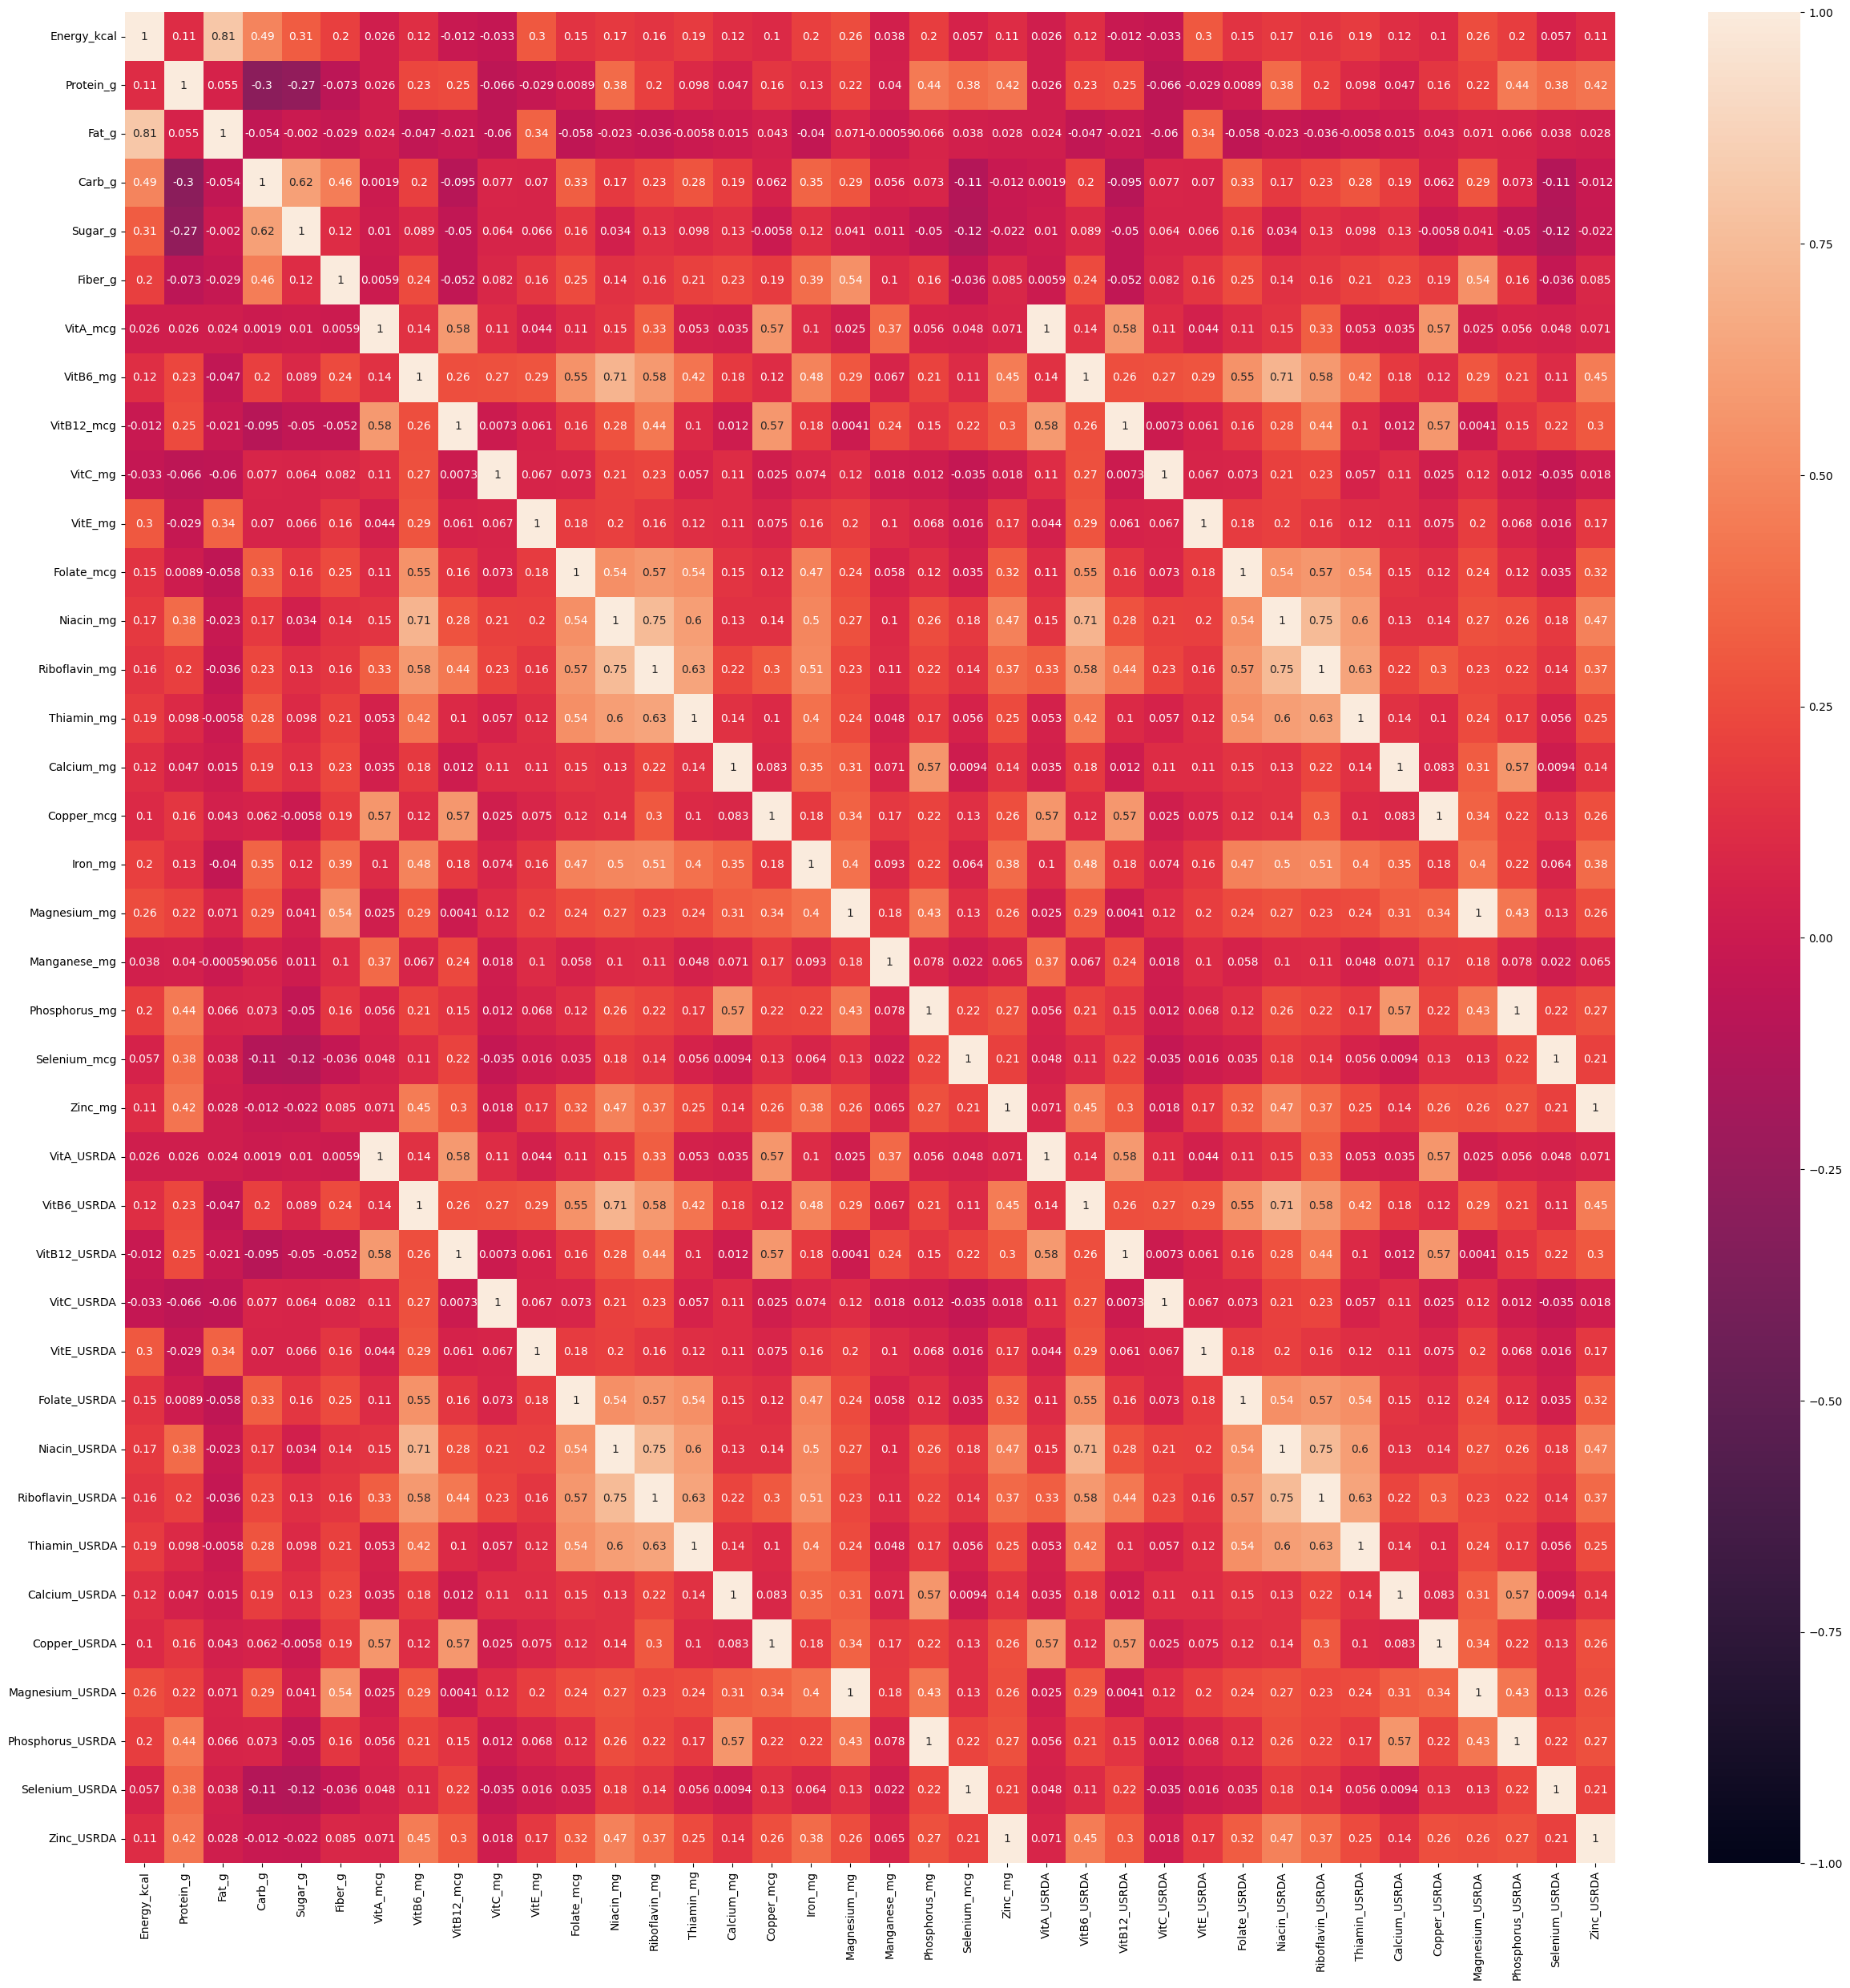

In [7]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_num_pre.corr(), vmin=-1, vmax=1, annot=True)

In [9]:
df_num = df_num_pre.copy()
cols = [col for col in df_num.columns if 'USRDA' not in col]

df_num = df_num[cols]

In [10]:
df_num_pre.shape, df_num.shape

((8618, 38), (8618, 23))

### Variables no numércias
Elimina las variables de texto del dataset

C:\Users\alber\AppData\Local\Temp\ipykernel_102980\2792358985.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_num.hist(ax=ax)


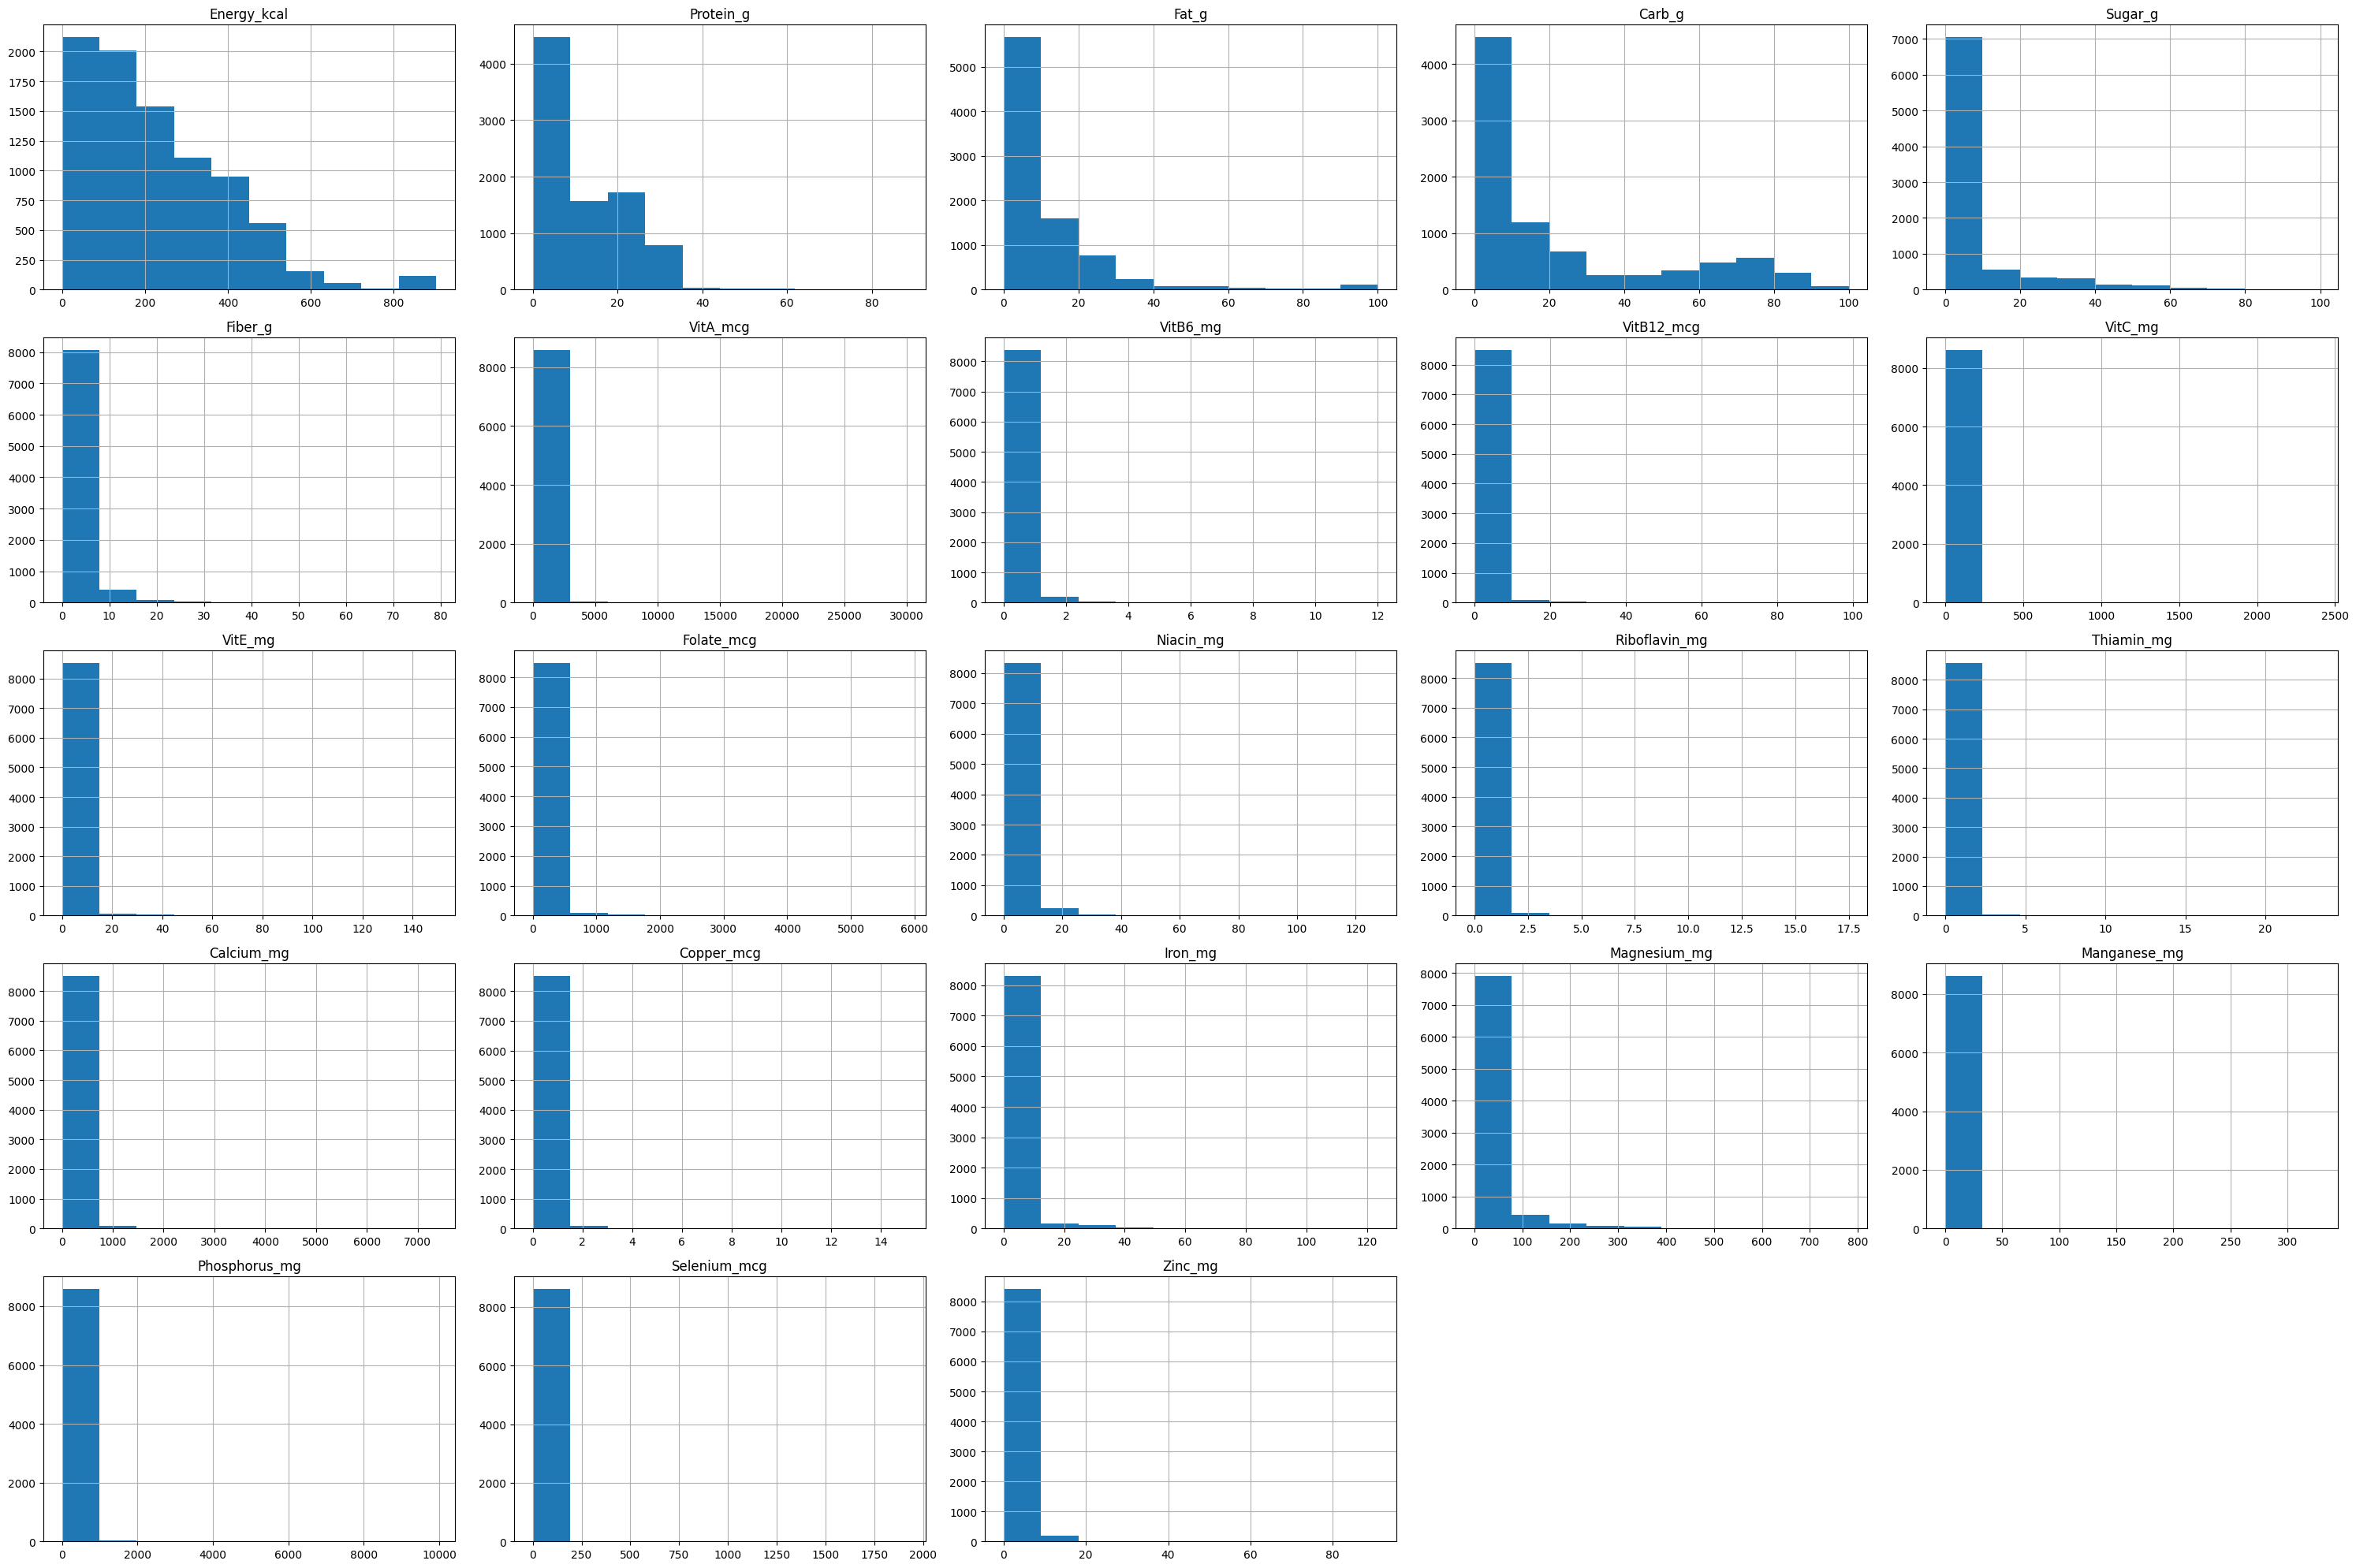

In [11]:
fig, ax = plt.subplots(1,1, figsize=(30, 20))
df_num.hist(ax=ax)
plt.tight_layout();

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [18]:
df_num_log = np.log(df_num +.05)

C:\Users\alber\AppData\Local\Temp\ipykernel_102980\1210615758.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_num_log.hist(ax=ax)


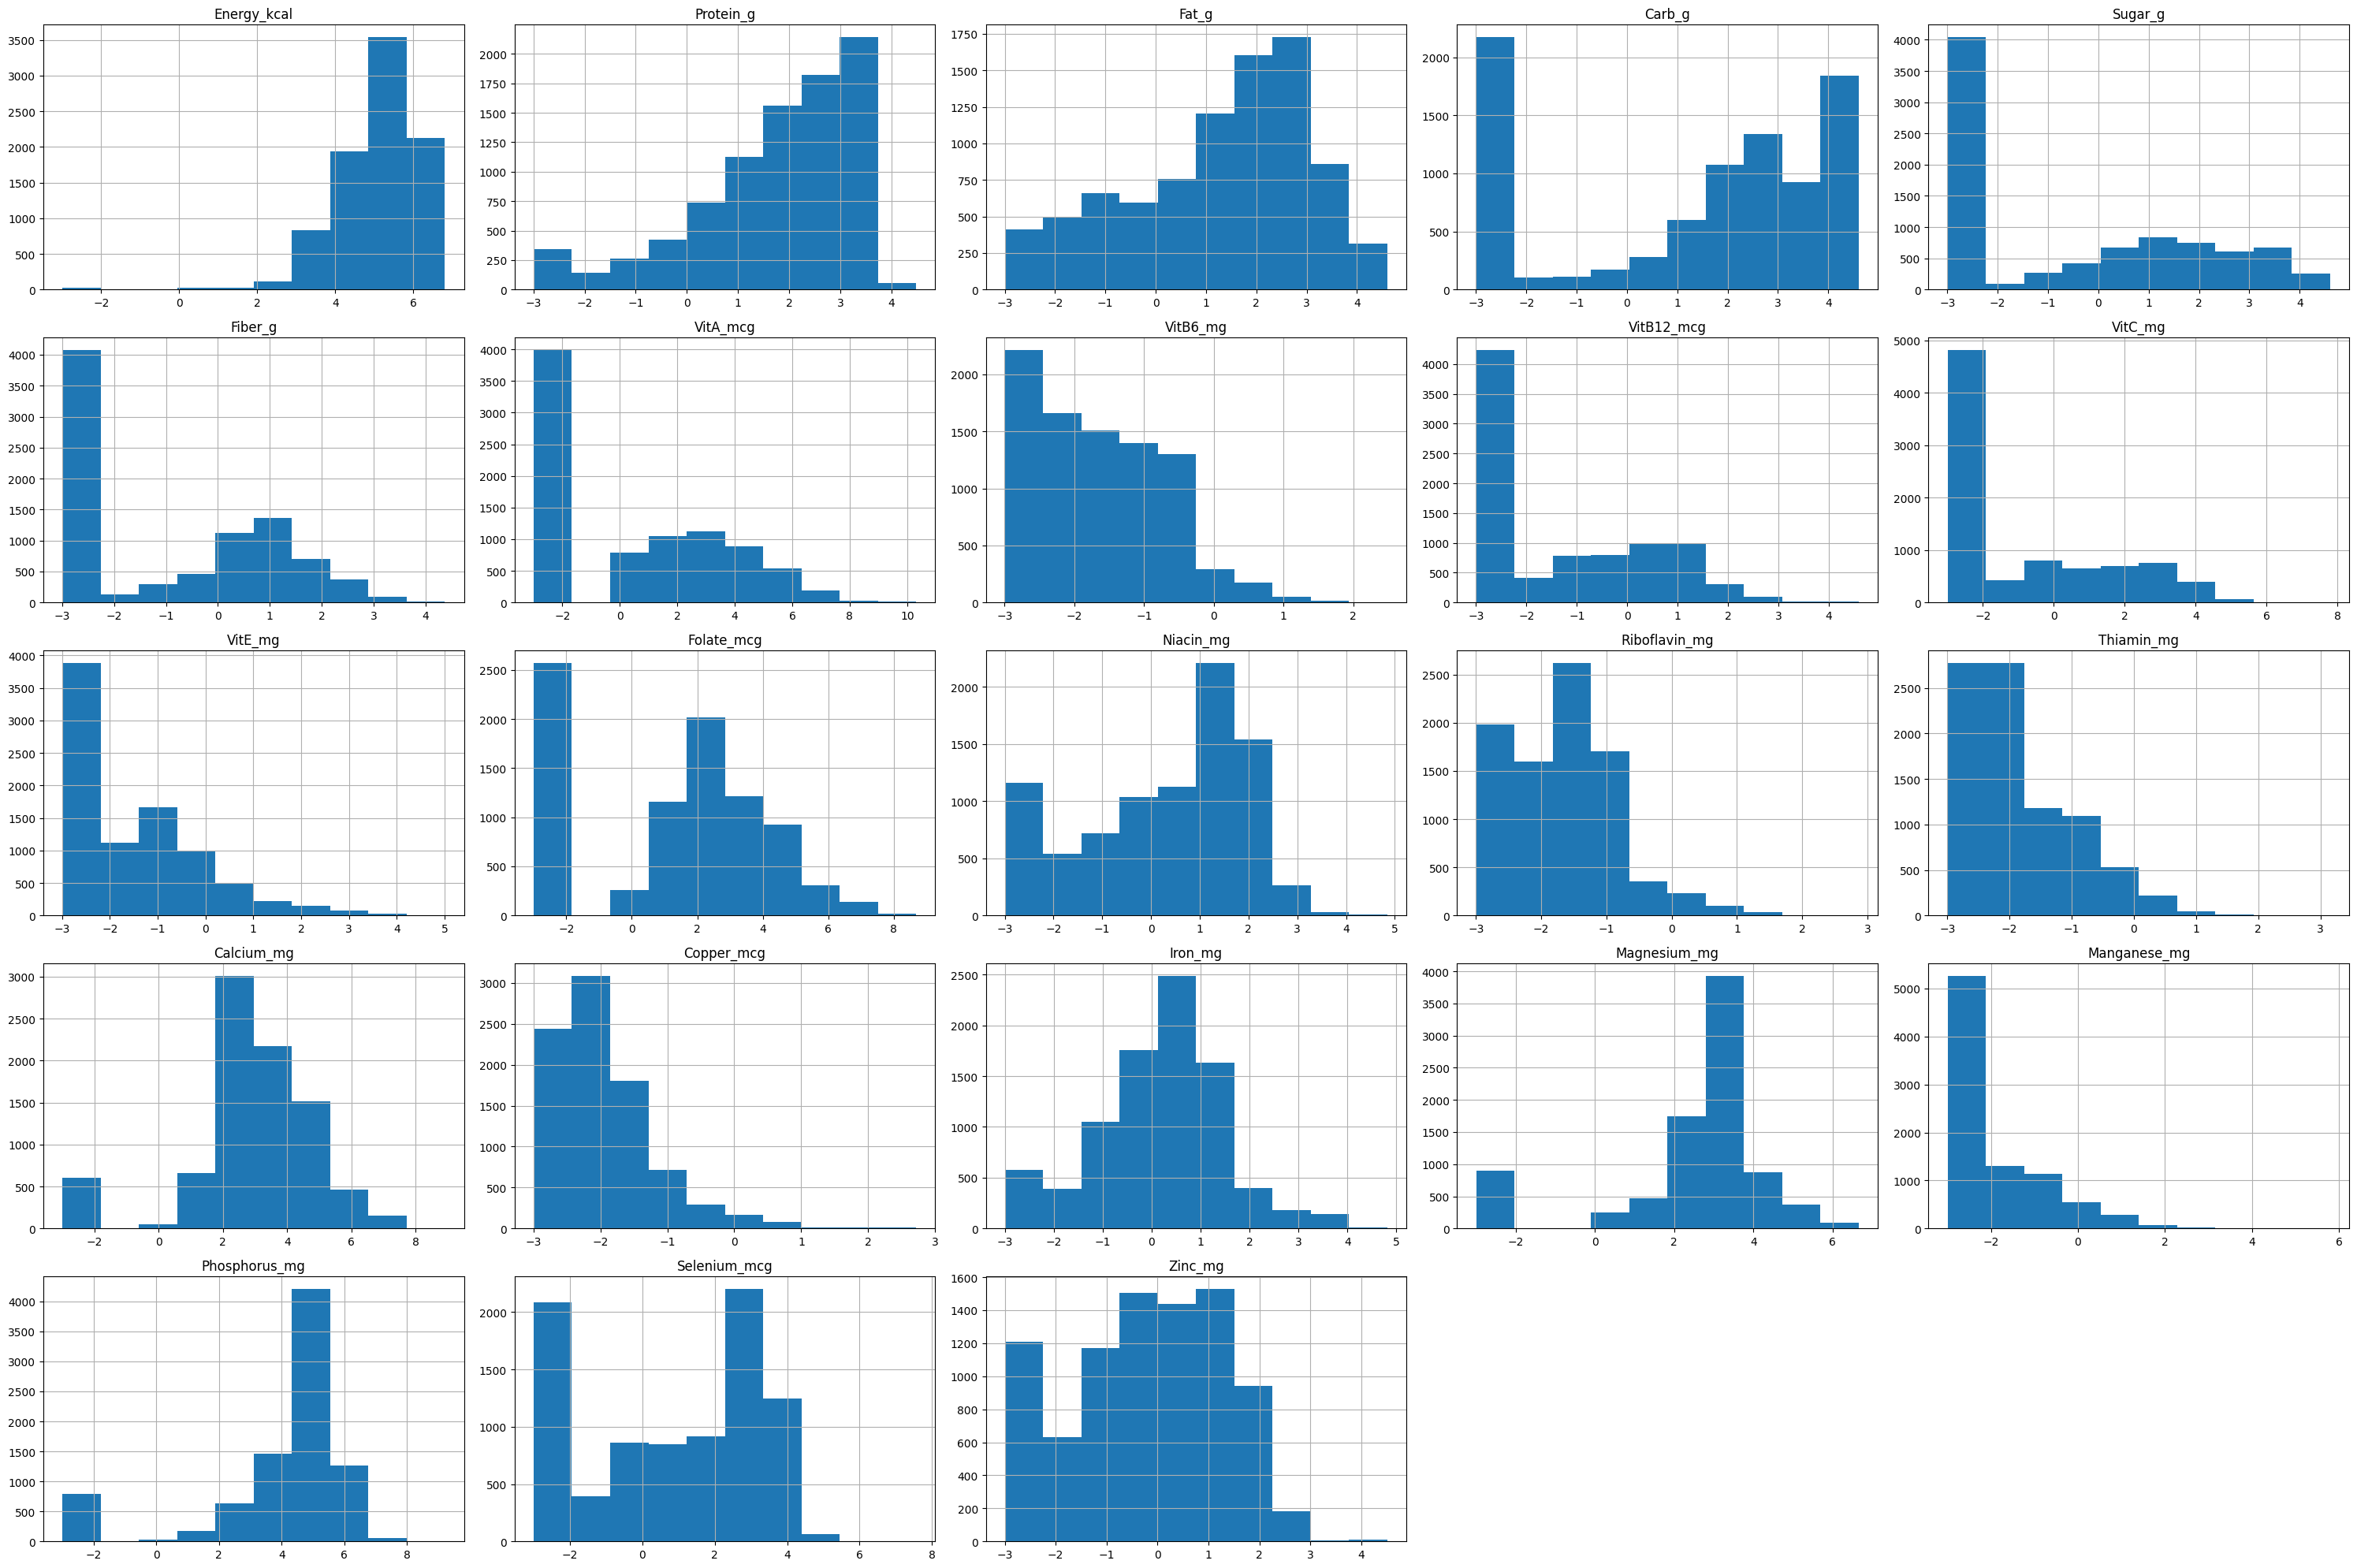

In [19]:
fig, ax = plt.subplots(1,1, figsize=(30, 20))
df_num_log.hist(ax=ax)
plt.tight_layout();

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [20]:
sc = StandardScaler()
X_sc = sc.fit_transform(df_num_log)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [22]:
pca_model = PCA(n_components=23, random_state=0)
pca_model.fit(X_sc)

PCA(n_components=23, random_state=0)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

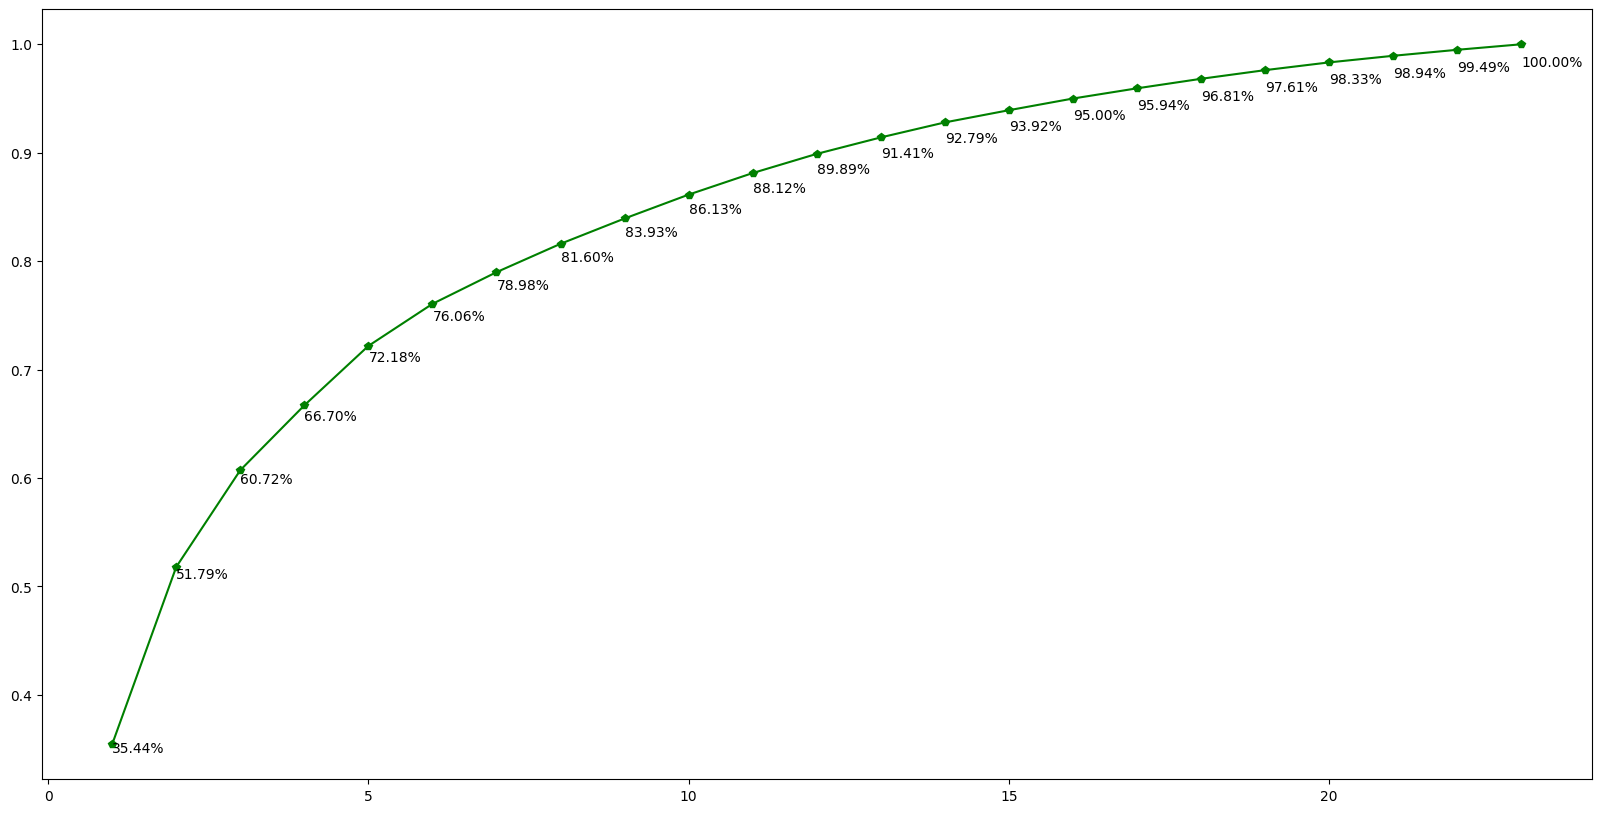

In [28]:
ratios = pca_model.explained_variance_ratio_
ratios_cum = np.cumsum(ratios)
x = np.arange(1, len(df_num.columns) + 1)

plt.figure(figsize=(20, 10))
plt.plot(x, ratios_cum, 'gp-')

for x, y in zip(x, ratios_cum):
    plt.annotate(f'{y:.2%}',
                xy=(x, 0.98*y))

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [30]:
ratios_cum[:10]

array([0.3543977 , 0.5179219 , 0.6071763 , 0.66697565, 0.72178133,
       0.76057593, 0.78980167, 0.81597495, 0.83932189, 0.86133742])

In [29]:
np.where(ratios_cum > 0.75)[0][0]

5

In [67]:
pca_model2 = PCA(n_components=.75, random_state=0)
pca_model2.fit(X_sc)

PCA(n_components=0.75, random_state=0)

In [68]:
pca_model2.n_components_

6

In [69]:
df_pca = pd.DataFrame(pca_model2.transform(X_sc), columns=[f'PCA_{n}' for n in range(1, pca_model2.n_components_ + 1)])
df_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,-2.307858,-1.845042,0.037870,3.355622,-2.506839,-0.675699
1,-2.106543,-1.629138,0.139387,3.151803,-2.521503,-0.644340
2,-4.458240,-2.316642,0.960693,3.532344,-2.449427,0.152591
3,1.814345,-1.197811,-0.511269,1.914471,-0.699107,-2.081094
4,1.287468,-1.141170,-0.485014,2.043649,-1.112781,-2.732130
...,...,...,...,...,...,...
8613,2.684196,-2.519886,-1.077421,2.062341,-1.080766,-0.175639
8614,0.263295,-1.714042,-1.407665,-0.745992,-0.360958,-1.025809
8615,-3.429076,0.944484,0.994346,-0.472640,0.925284,-0.313763
8616,1.596662,-0.878098,-1.671515,0.800041,-1.566481,0.492852


In [70]:
df_num

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19


In [71]:
X_sc.std()

0.9999999999999999

In [72]:
df_sc = pd.DataFrame(X_sc, columns=df_num.columns)
df_sc

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1.437336,-1.143079,1.716344,-1.251852,-0.647949,-0.977153,1.897817,-1.290359,-0.067559,-0.780642,...,-0.924769,-1.148284,0.143794,-1.258324,-2.114135,-0.827477,-0.824292,-0.319068,-0.272954,-1.130263
1,1.437336,-1.143079,1.716344,-1.251852,-0.647949,-0.977153,1.897817,-1.290359,-0.180944,-0.780642,...,-0.924769,-1.148284,0.143794,-0.911173,-1.290922,-0.827477,-0.759500,-0.336271,-0.272954,-1.349782
2,1.626542,-1.772994,1.827759,-1.537811,-0.959459,-0.977153,1.959814,-1.329901,-0.801694,-0.780642,...,-1.417780,-1.232461,-0.717820,-1.233562,-2.366261,-2.616702,-0.824292,-1.155562,-1.473537,-1.683052
3,0.767970,0.847862,1.150416,-0.135313,-0.012078,-0.977153,1.523746,0.153898,0.923022,-0.780642,...,0.981704,-0.744592,1.637869,-0.523355,-0.887040,0.338413,-0.684949,0.806423,0.763692,0.802880
4,0.814948,0.899533,1.167960,-0.072746,-0.004960,-0.977153,1.640962,-0.494067,0.940543,-0.780642,...,0.895014,-0.979333,1.755939,-0.768114,-0.671474,0.358875,-0.643194,0.868411,0.763692,0.788273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.629915,0.756665,1.076606,-1.537811,-0.959459,-0.977153,1.089981,0.930976,2.194368,-0.780642,...,0.297414,-0.879432,0.632432,0.115382,0.156925,0.799749,-0.824292,0.635874,1.402137,0.243640
8614,-0.324717,0.822172,-0.747976,0.164319,-0.959459,-0.977153,0.144362,-0.141825,1.233472,-0.780642,...,-1.072331,-1.014727,-0.278236,-0.624599,-0.467709,0.567080,-0.439195,0.845313,0.922226,0.459094
8615,0.511279,-2.957776,-2.320175,1.105699,1.920582,-0.977153,-0.976355,-1.350257,-0.904711,-0.780642,...,-0.610832,0.173470,-0.151895,-0.837599,0.848671,-0.061532,-0.824292,-0.762417,-0.405639,-0.778614
8616,-0.522744,0.669678,-0.481448,-0.190967,-0.959459,-0.977153,0.954674,-0.033519,0.450173,-0.780642,...,-0.104043,-1.051282,-0.278236,1.489088,0.827855,1.487039,-0.824292,0.663604,1.014010,0.184288


In [73]:
pd.DataFrame(pca_model2.inverse_transform(df_pca), columns=df_num.columns)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,0.840630,-0.566552,1.510980,-0.703960,0.287253,-1.213726,1.311705,-1.230850,0.261358,-0.619689,...,-1.193035,-1.826680,0.064180,-0.800598,-1.598049,-1.036541,-0.978199,-0.678336,0.340251,-0.671123
1,0.888190,-0.516446,1.500784,-0.604405,0.298711,-1.083930,1.211319,-1.198270,0.188245,-0.631981,...,-1.145471,-1.715039,0.088481,-0.684670,-1.482942,-0.941188,-0.829705,-0.614281,0.338228,-0.618178
2,0.907643,-1.230221,1.519024,-0.715793,0.490576,-1.201947,0.704925,-1.613695,-0.151563,-0.850482,...,-1.653925,-1.994244,-1.025455,-1.399314,-2.117310,-1.892497,-1.393418,-1.531865,-0.299932,-1.348859
3,0.655338,0.942407,1.193231,-0.463571,0.019918,-0.894204,1.594754,-0.087080,1.141899,-0.273822,...,0.329013,-0.584058,1.609051,-0.214392,0.004438,0.339342,-0.689159,0.823380,0.912858,0.598616
4,0.736564,0.948733,1.330782,-0.331517,0.103443,-0.923927,1.739647,-0.514715,0.996486,-0.383703,...,0.050566,-0.956671,1.963992,-0.323042,-0.170538,0.263794,-0.718149,0.798362,0.848084,0.439779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.551729,0.806735,1.245965,-1.508054,-0.740119,-1.512940,1.311821,0.678357,1.603036,-0.449050,...,0.430329,-0.432797,0.435790,0.219311,-0.172134,0.368228,-0.636685,0.749921,1.535234,1.009388
8614,-0.588355,0.540023,-0.182477,-0.936737,-1.108523,-0.992710,0.090172,-0.161237,0.518526,-0.363979,...,-0.289369,-0.798519,0.526086,0.053344,-0.230399,0.219184,-0.287475,0.376735,0.556832,0.363263
8615,-0.372639,-0.847797,-0.666465,0.905400,0.769703,0.668300,-0.609522,-0.909164,-0.992379,0.239756,...,-0.592979,-0.193887,-0.419542,-0.973869,-0.414518,-0.937667,-0.381444,-0.995210,-1.401520,-1.192822
8616,-0.055209,0.181906,0.324008,-0.978847,-0.787822,-0.833564,0.742481,0.364974,0.582326,-0.053466,...,-0.153655,-0.556990,0.193213,0.837340,-0.318059,0.561364,0.394241,0.483944,1.210064,0.649232


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [76]:
df.columns

Index(['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [90]:
df.head()

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [91]:
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,-2.307858,-1.845042,0.037870,3.355622,-2.506839,-0.675699
1,-2.106543,-1.629138,0.139387,3.151803,-2.521503,-0.644340
2,-4.458240,-2.316642,0.960693,3.532344,-2.449427,0.152591
3,1.814345,-1.197811,-0.511269,1.914471,-0.699107,-2.081094
4,1.287468,-1.141170,-0.485014,2.043649,-1.112781,-2.732130


In [92]:
df_cat = pd.concat([df[['FoodGroup']].reset_index(drop=True), df_pca], axis=1)
df_cat

,FoodGroup,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,Dairy and Egg Products,-2.307858,-1.845042,0.037870,3.355622,-2.506839,-0.675699
1,Dairy and Egg Products,-2.106543,-1.629138,0.139387,3.151803,-2.521503,-0.644340
2,Dairy and Egg Products,-4.458240,-2.316642,0.960693,3.532344,-2.449427,0.152591
3,Dairy and Egg Products,1.814345,-1.197811,-0.511269,1.914471,-0.699107,-2.081094
4,Dairy and Egg Products,1.287468,-1.141170,-0.485014,2.043649,-1.112781,-2.732130
...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,2.684196,-2.519886,-1.077421,2.062341,-1.080766,-0.175639
8614,Finfish and Shellfish Products,0.263295,-1.714042,-1.407665,-0.745992,-0.360958,-1.025809
8615,Sweets,-3.429076,0.944484,0.994346,-0.472640,0.925284,-0.313763
8616,Finfish and Shellfish Products,1.596662,-0.878098,-1.671515,0.800041,-1.566481,0.492852


In [ ]:
df_cat[['FoodGroup', 'PCA_1']]

In [125]:
for col in df_cat.columns.drop('FoodGroup'):
    print(df_cat[['FoodGroup', col]].set_index('FoodGroup').abs().sort_values(by=col, ascending=False).iloc[:3])
    print('\n')

              PCA_1
FoodGroup          
Beverages  8.653772
Sweets     8.581068
Beverages  8.493369


                                      PCA_2
FoodGroup                                  
Beverages                          5.661784
Vegetables and Vegetable Products  5.655948
Spices and Herbs                   5.603373


                   PCA_3
FoodGroup               
Baked Products  4.822893
Baked Products  4.818489
Beverages       4.796093


                  PCA_4
FoodGroup              
Fats and Oils  4.876909
Fats and Oils  4.874354
Fats and Oils  4.874354


                      PCA_5
FoodGroup                  
Breakfast Cereals  5.600755
Breakfast Cereals  5.541891
Breakfast Cereals  5.525634


                            PCA_6
FoodGroup                        
Snacks                   5.754701
Fruits and Fruit Juices  4.262449
Fats and Oils            3.900169




In [126]:
df_loads = pd.DataFrame(pca_model2.components_, index=df_pca.columns, columns=df_num.columns).T
sr_imp = df_loads.apply(lambda x: df_loads.columns[x.abs().argmax()], axis=1)

In [127]:
for pca_var in np.unique(sr_imp.values):
    print(pca_var)
    print(sr_imp[sr_imp == pca_var])
    print("\n\n")

PCA_1
Protein_g        PCA_1
Niacin_mg        PCA_1
Iron_mg          PCA_1
Magnesium_mg     PCA_1
Phosphorus_mg    PCA_1
Selenium_mcg     PCA_1
Zinc_mg          PCA_1
dtype: object



PCA_2
Carb_g          PCA_2
Sugar_g         PCA_2
Fiber_g         PCA_2
VitB12_mcg      PCA_2
Manganese_mg    PCA_2
dtype: object



PCA_3
Energy_kcal    PCA_3
Fat_g          PCA_3
VitC_mg        PCA_3
Folate_mcg     PCA_3
dtype: object



PCA_4
VitA_mcg    PCA_4
VitE_mg     PCA_4
dtype: object



PCA_5
Riboflavin_mg    PCA_5
Thiamin_mg       PCA_5
Copper_mcg       PCA_5
dtype: object



PCA_6
VitB6_mg      PCA_6
Calcium_mg    PCA_6
dtype: object





In [124]:
df[df['FoodGroup'] == 'Fats and Oils']

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
4001,Fats and Oils,"FAT,BEEF TALLOW","Fat, beef tallow",NaN,NaN,NaN,902.0,0.0,100.0,0.0,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003636,0.000000
4002,Fats and Oils,LARD,Lard,NaN,NaN,NaN,902.0,0.0,100.0,0.0,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003636,0.010000
4011,Fats and Oils,"SALAD DRSNG,KRAFT MAYO LT MAYO","Salad dressing, KRAFT Mayo Light Mayonnaise",NaN,"Kraft Foods, Inc.",NaN,334.0,0.6,32.9,8.5,...,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.082857,0.000000,0.000000
4013,Fats and Oils,"SALAD DRSNG,KRAFT MAYO FAT FREE MAYO DRSNG","Salad dressing, KRAFT Mayo Fat Free Mayonnaise...",NaN,NaN,NaN,70.0,0.2,2.7,12.4,...,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.038571,0.000000,0.000000
4014,Fats and Oils,"SALAD DRSNG,KRAFT MIRACLE WHIP FREE NONFAT DRSNG","Salad dressing, KRAFT MIRACLE WHIP FREE Nonfat...",NaN,"Kraft Foods, Inc.",NaN,84.0,0.2,2.7,15.5,...,0.000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.007143,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43329,Fats and Oils,"SALAD DRSNG,MAYO & MAYONNAISE-TYPE,LO CAL","Salad dressing, mayonnaise and mayonnaise-type...",NaN,NaN,NaN,263.0,0.9,19.0,23.9,...,0.015,0.000000,0.015385,0.008333,0.011667,0.000001,0.004762,0.042857,0.029091,0.016364
43331,Fats and Oils,"SALAD DRSNG,BACON&TOMATO","Salad dressing, bacon and tomato",NaN,NaN,NaN,326.0,1.8,35.0,2.0,...,0.000,0.043750,0.015385,0.033333,0.003333,0.000033,0.014286,0.035714,0.029091,0.018182
43355,Fats and Oils,"MAYONNAISE,LO NA,LO CAL OR DIET","Mayonnaise, low sodium, low calorie or diet",NaN,NaN,NaN,231.0,0.3,19.2,16.0,...,0.000,0.000000,0.007692,0.000000,0.000000,0.000000,0.000000,0.000000,0.029091,0.010000
